# Alura Course - Pandas

## Downloading data file

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from helper.data_acquisition import from_url
from helper.data_manipulation import unzip
from helper.utils import mkdir

In [3]:
from_url('https://s3.amazonaws.com/caelum-online-public/856-introducao-python-pandas/02/extras.zip')

In [4]:
unzip('./data/extras.zip', './data')

## Load data CSV using pandas

In [5]:
import pandas as pd

In [6]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep=';')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [7]:
type(dataframe)

pandas.core.frame.DataFrame

In [8]:
dataframe.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [9]:
dataframe.tail(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
19830,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento


## General information

In [10]:
dataframe.dtypes

Tipo              object
Bairro            object
Quartos            int64
Vagas              int64
Suites             int64
Area               int64
Valor            float64
Condominio       float64
IPTU             float64
Valor m2         float64
Tipo Agregado     object
dtype: object

In [11]:
data_types = pd.DataFrame(dataframe.dtypes, columns=['Data Types'])
data_types.columns.name = 'Variables'
data_types

Variables,Data Types
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64
Valor m2,float64


In [12]:
dataframe.shape

(19831, 11)

## Removing repeated values

In [13]:
property_type = dataframe['Tipo']
property_type

0        Apartamento
1        Apartamento
2        Apartamento
3        Apartamento
4        Apartamento
            ...     
19826      Quitinete
19827      Quitinete
19828      Quitinete
19829      Quitinete
19830      Quitinete
Name: Tipo, Length: 19831, dtype: object

In [14]:
type(property_type)

pandas.core.series.Series

In [15]:
property_type.drop_duplicates(inplace=True)

In [16]:
property_type = pd.DataFrame(property_type)

In [17]:
property_type

,Tipo
0,Apartamento
16923,Casa
17821,Casa de Condomínio
18785,Casa de Vila
19018,Quitinete


In [18]:
property_type.index

Int64Index([0, 16923, 17821, 18785, 19018], dtype='int64')

In [19]:
property_type.shape

(5, 1)

In [20]:
property_type.index = range(property_type.shape[0])

In [21]:
property_type.columns.name = 'Id'

In [22]:
property_type

Id,Tipo
0,Apartamento
1,Casa
2,Casa de Condomínio
3,Casa de Vila
4,Quitinete


## Series

In [23]:
data = [1, 2, 3, 4, 5]
data = pd.Series(data)
data

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [24]:
data.index = [ f"Line: {i}" for i in range(data.shape[0]) ]
data

Line: 0    1
Line: 1    2
Line: 2    3
Line: 3    4
Line: 4    5
dtype: int64

In [25]:
data = { f"Line: {i}": i for i in range(5) }
data = pd.Series(data)
data

Line: 0    0
Line: 1    1
Line: 2    2
Line: 3    3
Line: 4    4
dtype: int64

In [26]:
data_2 = data + 2
data_2

Line: 0    2
Line: 1    3
Line: 2    4
Line: 3    5
Line: 4    6
dtype: int64

## Data Frame

In [27]:
data = [[1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]]

In [28]:
df1 = pd.DataFrame(data)
df1

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [29]:
index = [ f"Line: {i}" for i in range(3) ]
df1 = pd.DataFrame(data, index=index)
df1

,0,1,2
Line: 0,1,2,3
Line: 1,4,5,6
Line: 2,7,8,9


In [30]:
columns = [ f"Column: {i}" for i in range(3)]
df1 = pd.DataFrame(data, index=index, columns=columns)
df1

,Column: 0,Column: 1,Column: 2
Line: 0,1,2,3
Line: 1,4,5,6
Line: 2,7,8,9


In [31]:
data = { 
            'Column: 0': { 'Line: 0': 1, 'Line: 1': 4, 'Line: 2': 7 },
            'Column: 1': { 'Line: 0': 2, 'Line: 1': 5, 'Line: 2': 8 },
            'Column: 2': { 'Line: 0': 3, 'Line: 1': 8, 'Line: 2': 9}
       }

df2 = pd.DataFrame(data)
df2

,Column: 0,Column: 1,Column: 2
Line: 0,1,2,3
Line: 1,4,5,8
Line: 2,7,8,9


In [32]:
df1[df1 > 0] = 'A'
df1

,Column: 0,Column: 1,Column: 2
Line: 0,A,A,A
Line: 1,A,A,A
Line: 2,A,A,A


In [33]:
df2[df2 > 0] = 'B'
df2

,Column: 0,Column: 1,Column: 2
Line: 0,B,B,B
Line: 1,B,B,B
Line: 2,B,B,B


In [34]:
df3 = pd.concat([df1, df2])
df3

,Column: 0,Column: 1,Column: 2
Line: 0,A,A,A
Line: 1,A,A,A
Line: 2,A,A,A
Line: 0,B,B,B
Line: 1,B,B,B
Line: 2,B,B,B


In [35]:
df3 = pd.concat([df1, df2], axis=1)
df3

,Column: 0,Column: 1,Column: 2,Column: 0,Column: 1,Column: 2
Line: 0,A,A,A,B,B,B
Line: 1,A,A,A,B,B,B
Line: 2,A,A,A,B,B,B


## Filtering data

In [36]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep=';')
dataframe.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [37]:
property_type

Id,Tipo
0,Apartamento
1,Casa
2,Casa de Condomínio
3,Casa de Vila
4,Quitinete


In [38]:
house_types = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [39]:
dataframe['Tipo'].isin(house_types)

0        False
1        False
2        False
3        False
4        False
         ...  
19826    False
19827    False
19828    False
19829    False
19830    False
Name: Tipo, Length: 19831, dtype: bool

In [40]:
df_houses = dataframe[dataframe['Tipo'].isin(house_types)]
df_houses

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
16923,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
16924,Casa,Campo Grande,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
16925,Casa,Méier,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
16926,Casa,Maracanã,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
16927,Casa,Benfica,1,0,0,33,1200.0,0.0,0.0,36.36,Casa
...,...,...,...,...,...,...,...,...,...,...,...
19013,Casa de Vila,Riachuelo,2,0,0,43,1000.0,0.0,120.0,23.26,Casa
19014,Casa de Vila,Quintino Bocaiúva,2,0,0,58,1000.0,0.0,0.0,17.24,Casa
19015,Casa de Vila,Todos os Santos,3,1,1,92,1500.0,80.0,11.0,16.30,Casa
19016,Casa de Vila,Riachuelo,3,0,0,73,850.0,0.0,0.0,11.64,Casa


In [41]:
df_houses.index = range(df_houses.shape[0])

In [42]:
df_houses.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
1,Casa,Campo Grande,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
2,Casa,Méier,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
3,Casa,Maracanã,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
4,Casa,Benfica,1,0,0,33,1200.0,0.0,0.0,36.36,Casa


## Exporting Data

In [43]:
mkdir('./data/export/')
df_houses.to_csv('./data/export/df_houses.csv', sep=';', index=False)

In [44]:
df_houses_2 = pd.read_csv('./data/export/df_houses.csv', sep=';')
df_houses_2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
1,Casa,Campo Grande,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
2,Casa,Méier,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
3,Casa,Maracanã,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
4,Casa,Benfica,1,0,0,33,1200.0,0.0,0.0,36.36,Casa
...,...,...,...,...,...,...,...,...,...,...,...
2090,Casa de Vila,Riachuelo,2,0,0,43,1000.0,0.0,120.0,23.26,Casa
2091,Casa de Vila,Quintino Bocaiúva,2,0,0,58,1000.0,0.0,0.0,17.24,Casa
2092,Casa de Vila,Todos os Santos,3,1,1,92,1500.0,80.0,11.0,16.30,Casa
2093,Casa de Vila,Riachuelo,3,0,0,73,850.0,0.0,0.0,11.64,Casa


## Organazing the indexes

In [45]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
index = list('321')
columns = list('zyx')

df = pd.DataFrame(data, index, columns)
df

,z,y,x
3,1,2,3
2,4,5,6
1,7,8,9


In [46]:
df.sort_index(inplace=True)
df

,z,y,x
1,7,8,9
2,4,5,6
3,1,2,3


In [47]:
df.sort_index(inplace=True, axis=1)
df

,x,y,z
1,9,8,7
2,6,5,4
3,3,2,1


In [48]:
df.sort_values(by='x', inplace=True)
df

,x,y,z
3,3,2,1
2,6,5,4
1,9,8,7


In [49]:
df.sort_values(by='3', axis=1, inplace=True)
df

,z,y,x
3,1,2,3
2,4,5,6
1,7,8,9


## Selections and frequency

In [50]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep = ';')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [51]:
apartments_selection = dataframe['Tipo'] == 'Apartamento'
apartments = dataframe[apartments_selection]
apartments

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
16918,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0,19.23,Apartamento
16919,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
16920,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
16921,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [52]:
houses_selection = (dataframe['Tipo'] == 'Casa') | (dataframe['Tipo'] == 'Casa de Condomínio') | (dataframe['Tipo'] == 'Casa de Vila')
houses = dataframe[houses_selection]
houses

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
16923,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
16924,Casa,Campo Grande,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
16925,Casa,Méier,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
16926,Casa,Maracanã,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
16927,Casa,Benfica,1,0,0,33,1200.0,0.0,0.0,36.36,Casa
...,...,...,...,...,...,...,...,...,...,...,...
19013,Casa de Vila,Riachuelo,2,0,0,43,1000.0,0.0,120.0,23.26,Casa
19014,Casa de Vila,Quintino Bocaiúva,2,0,0,58,1000.0,0.0,0.0,17.24,Casa
19015,Casa de Vila,Todos os Santos,3,1,1,92,1500.0,80.0,11.0,16.30,Casa
19016,Casa de Vila,Riachuelo,3,0,0,73,850.0,0.0,0.0,11.64,Casa


In [53]:
area_60_100_sqr_meters_selection = (60 <= dataframe['Area']) & (dataframe['Area'] <= 100)
area_60_100_sqr_meters = dataframe[area_60_100_sqr_meters_selection]
area_60_100_sqr_meters

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.71,Apartamento
10,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19249,Quitinete,Pedra de Guaratiba,1,0,0,70,400.0,0.0,0.0,5.71,Apartamento
19390,Quitinete,Realengo,1,0,0,60,650.0,0.0,0.0,10.83,Apartamento
19482,Quitinete,Ipanema,1,0,0,60,1800.0,580.0,79.0,30.00,Apartamento
19706,Quitinete,Higienópolis,1,0,0,96,700.0,0.0,0.0,7.29,Apartamento


In [54]:
at_least_4_bedrooms_rent_less_than_2000_selection = (dataframe['Quartos'] >= 4) & (dataframe['Valor'] < 2000)
at_least_4_bedrooms_rent_less_than_2000 = dataframe[at_least_4_bedrooms_rent_less_than_2000_selection]
at_least_4_bedrooms_rent_less_than_2000.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
358,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,0.0,11.88,Apartamento
2965,Apartamento,Campo Grande,4,2,1,115,1900.0,500.0,0.0,16.52,Apartamento
3260,Apartamento,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0,18.10,Apartamento
4878,Apartamento,Pechincha,4,1,2,178,1900.0,1100.0,270.0,10.67,Apartamento
5690,Apartamento,Recreio dos Bandeirantes,4,2,3,280,1800.0,1400.0,580.0,6.43,Apartamento


In [55]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
index = 'l1 l2 l3 l4'.split()
columns = 'c1 c2 c3'.split()

df = pd.DataFrame(data, index, columns)
df

,c1,c2,c3
l1,1,2,3
l2,4,5,6
l3,7,8,9
l4,10,11,12


In [56]:
df[['c1', 'c3']]

,c1,c3
l1,1,3
l2,4,6
l3,7,9
l4,10,12


In [57]:
df[1:3]

,c1,c2,c3
l2,4,5,6
l3,7,8,9


In [58]:
df[1:3][['c1', 'c3']]

,c1,c3
l2,4,6
l3,7,9


In [59]:
df.loc['l3']

c1    7
c2    8
c3    9
Name: l3, dtype: int64

In [60]:
df.loc[['l3', 'l2']]

,c1,c2,c3
l3,7,8,9
l2,4,5,6


In [61]:
df.iloc[0, 1]

2

In [62]:
df.loc[['l1', 'l3'], ['c1', 'c3']]

,c1,c3
l1,1,3
l3,7,9


In [63]:
df.iloc[[0, 2], [1, 2]]

,c2,c3
l1,2,3
l3,8,9


## Handling missing values

In [64]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep = ';')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [65]:
# CREATING SOME NULL VALUES
import numpy as np

dataframe['IPTU'] = dataframe['IPTU'].replace(0, np.nan)
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,NaN,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,NaN,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [66]:
dataframe.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,False,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
19826,True,True,True,True,True,True,True,True,True,True,True
19827,True,True,True,True,True,True,True,True,False,True,True
19828,True,True,True,True,True,True,True,True,False,True,True
19829,True,True,True,True,True,True,True,True,True,True,True


In [67]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19831 entries, 0 to 19830
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           19831 non-null  object 
 1   Bairro         19831 non-null  object 
 2   Quartos        19831 non-null  int64  
 3   Vagas          19831 non-null  int64  
 4   Suites         19831 non-null  int64  
 5   Area           19831 non-null  int64  
 6   Valor          19831 non-null  float64
 7   Condominio     19831 non-null  float64
 8   IPTU           14058 non-null  float64
 9   Valor m2       19831 non-null  float64
 10  Tipo Agregado  19831 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.7+ MB


In [68]:
dataframe[dataframe['IPTU'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,16.67,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,NaN,14.71,Apartamento
10,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,NaN,25.64,Apartamento
14,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,NaN,32.89,Apartamento
16,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,NaN,21.90,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19821,Quitinete,Flamengo,1,0,0,22,1000.0,378.0,NaN,45.45,Apartamento
19822,Quitinete,Glória,1,0,0,32,1250.0,320.0,NaN,39.06,Apartamento
19825,Quitinete,Copacabana,1,0,0,32,1600.0,692.0,NaN,50.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,NaN,39.13,Apartamento


In [69]:
dataframe.dropna(subset=['IPTU'], inplace=True)
dataframe[dataframe['IPTU'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado


In [70]:
dataframe.loc[dataframe['Condominio'] < 120, 'Condominio'] = np.nan
dataframe[dataframe['Condominio'].isna()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
1051,Apartamento,Santa Teresa,2,0,0,74,1600.0,NaN,1.0,21.62,Apartamento
1216,Apartamento,Copacabana,1,0,0,50,2500.0,NaN,1.0,50.00,Apartamento
1563,Apartamento,Méier,2,0,1,87,1300.0,NaN,16.0,14.94,Apartamento
1593,Apartamento,Rio Comprido,3,1,1,144,2499.0,NaN,125.0,17.35,Apartamento
2059,Apartamento,Santa Teresa,2,0,0,75,1700.0,NaN,427.0,22.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19489,Quitinete,Bonsucesso,1,0,0,40,600.0,NaN,12.0,15.00,Apartamento
19634,Quitinete,Anil,1,0,0,20,300.0,NaN,8.0,15.00,Apartamento
19704,Quitinete,Vila Isabel,1,0,0,22,700.0,NaN,22.0,31.82,Apartamento
19780,Quitinete,Engenho Novo,1,0,0,30,700.0,NaN,500.0,23.33,Apartamento


In [71]:
criteria = (dataframe['Tipo'] == 'Apartamento') & (dataframe['Condominio'].isna())
dataframe = dataframe[~criteria]
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento
19826,Quitinete,Glória,1,0,0,10,400.0,NaN,10.0,40.00,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [72]:
dataframe.fillna({ 'Condominio': 0, 'IPTU': 1 })

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.00,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [73]:
dataframe = dataframe.fillna(0)
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.00,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [74]:
data = pd.Series([.50, np.nan, np.nan, .52, .51, .55, np.nan, .72, np.nan])

In [75]:
data.fillna(0)

0    0.50
1    0.00
2    0.00
3    0.52
4    0.51
5    0.55
6    0.00
7    0.72
8    0.00
dtype: float64

In [76]:
data.fillna(method='ffill')

0    0.50
1    0.50
2    0.50
3    0.52
4    0.51
5    0.55
6    0.55
7    0.72
8    0.72
dtype: float64

In [77]:
data.fillna(method='bfill')

0    0.50
1    0.52
2    0.52
3    0.52
4    0.51
5    0.55
6    0.72
7    0.72
8     NaN
dtype: float64

In [78]:
data.fillna(method='pad')

0    0.50
1    0.50
2    0.50
3    0.52
4    0.51
5    0.55
6    0.55
7    0.72
8    0.72
dtype: float64

In [79]:
data.fillna(method='backfill')

0    0.50
1    0.52
2    0.52
3    0.52
4    0.51
5    0.55
6    0.72
7    0.72
8     NaN
dtype: float64

In [80]:
data.fillna(data.mean())

0    0.50
1    0.56
2    0.56
3    0.52
4    0.51
5    0.55
6    0.56
7    0.72
8    0.56
dtype: float64

In [81]:
data.fillna(method='ffill', limit=1)

0    0.50
1    0.50
2     NaN
3    0.52
4    0.51
5    0.55
6    0.55
7    0.72
8    0.72
dtype: float64

## Creating new variables

In [82]:
dataframe['Valor Bruto'] = dataframe['Valor'] + dataframe['Condominio']
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1190.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1601.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,2142.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,1955.0
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,2561.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento,2210.0
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento,3115.0
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.00,Apartamento,400.0
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento,1786.0


In [83]:
dataframe['Valor m2'] = dataframe['Valor'] / dataframe['Area']
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.333333,Apartamento,1190.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.000000,Apartamento,1601.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.428571,Apartamento,2142.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.666667,Apartamento,1955.0
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.000000,Apartamento,2561.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.444444,Apartamento,2210.0
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.000000,Apartamento,3115.0
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.000000,Apartamento,400.0
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.181818,Apartamento,1786.0


In [84]:
dataframe['Valor m2'] = dataframe['Valor m2'].round(2)
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1190.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1601.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,2142.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,1955.0
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,2561.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento,2210.0
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento,3115.0
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.00,Apartamento,400.0
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento,1786.0


In [85]:
dataframe['Valor Bruto m2'] = (dataframe['Valor Bruto'] / dataframe['Area']).round(2)
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto,Valor Bruto m2
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1190.0,79.33
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1601.0,32.02
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,2142.0,30.60
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,1955.0,21.72
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,2561.0,64.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento,2210.0,61.39
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento,3115.0,97.34
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.00,Apartamento,400.0,40.00
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento,1786.0,81.18


In [86]:
pd.DataFrame(dataframe['Tipo'].drop_duplicates())

,Tipo
0,Apartamento
16929,Casa
17827,Casa de Condomínio
18786,Casa de Vila
19018,Quitinete


In [87]:
house_types = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
dataframe['Tipo Agregado'] = dataframe['Tipo'].apply(lambda x: 'Casa' if x in house_types else 'Apartamento')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto,Valor Bruto m2
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1190.0,79.33
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1601.0,32.02
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,2142.0,30.60
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,1955.0,21.72
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,2561.0,64.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento,2210.0,61.39
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento,3115.0,97.34
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.00,Apartamento,400.0,40.00
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento,1786.0,81.18


In [88]:
subset = dataframe[['Valor m2', 'Valor Bruto', 'Valor Bruto m2', 'Tipo Agregado']]
subset

,Valor m2,Valor Bruto,Valor Bruto m2,Tipo Agregado
0,53.33,1190.0,79.33,Apartamento
2,26.00,1601.0,32.02,Apartamento
3,21.43,2142.0,30.60,Apartamento
4,16.67,1955.0,21.72,Apartamento
5,50.00,2561.0,64.03,Apartamento
...,...,...,...,...
19823,44.44,2210.0,61.39,Apartamento
19824,75.00,3115.0,97.34,Apartamento
19826,40.00,400.0,40.00,Apartamento
19829,68.18,1786.0,81.18,Apartamento


In [89]:
del subset['Valor Bruto']
subset

,Valor m2,Valor Bruto m2,Tipo Agregado
0,53.33,79.33,Apartamento
2,26.00,32.02,Apartamento
3,21.43,30.60,Apartamento
4,16.67,21.72,Apartamento
5,50.00,64.03,Apartamento
...,...,...,...
19823,44.44,61.39,Apartamento
19824,75.00,97.34,Apartamento
19826,40.00,40.00,Apartamento
19829,68.18,81.18,Apartamento


In [90]:
subset.pop('Valor Bruto m2')

0        79.33
2        32.02
3        30.60
4        21.72
5        64.03
         ...  
19823    61.39
19824    97.34
19826    40.00
19829    81.18
19830    42.59
Name: Valor Bruto m2, Length: 14020, dtype: float64

In [91]:
subset

,Valor m2,Tipo Agregado
0,53.33,Apartamento
2,26.00,Apartamento
3,21.43,Apartamento
4,16.67,Apartamento
5,50.00,Apartamento
...,...,...
19823,44.44,Apartamento
19824,75.00,Apartamento
19826,40.00,Apartamento
19829,68.18,Apartamento


In [92]:
dataframe.drop(['Valor Bruto', 'Valor Bruto m2'], axis=1, inplace=True)
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19823,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,44.44,Apartamento
19824,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,75.00,Apartamento
19826,Quitinete,Glória,1,0,0,10,400.0,0.0,10.0,40.00,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


## Counting

In [93]:
data = pd.Series(list('asddasdasdasdasdasfdasfsaddasfsdaf'))
data.head(2)

0    a
1    s
dtype: object

In [94]:
data.unique()

array(['a', 's', 'd', 'f'], dtype=object)

In [95]:
data.value_counts()

s    10
d    10
a    10
f     4
dtype: int64

In [96]:
dataframe.Tipo.unique()

array(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila',
       'Quitinete'], dtype=object)

In [97]:
dataframe.Tipo.value_counts()

Apartamento           12381
Casa de Condomínio      686
Quitinete               528
Casa                    341
Casa de Vila             84
Name: Tipo, dtype: int64

## Grouping Data

In [98]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep = ';')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [99]:
dataframe['Valor'].mean()

3465.402299430185

In [100]:
neighborhood_group = dataframe.groupby('Bairro')

In [101]:
list(neighborhood_group.groups.items())[:2]

[('Abolição',
  Int64Index([ 2470,  5370,  5902, 10205, 11004, 12465, 14575, 15606, 16585,
              17191, 17605, 17625, 17704, 18798, 18884],
             dtype='int64')),
 ('Alto da Boa Vista',
  Int64Index([9321, 9714, 10264, 17013, 18419, 18932], dtype='int64'))]

In [102]:
[ f'{neighborhood} -> {values["Valor"].mean()}' for neighborhood, values in neighborhood_group ][:10]

['Abolição -> 1195.3333333333333',
 'Alto da Boa Vista -> 3966.6666666666665',
 'Anchieta -> 875.0',
 'Andaraí -> 1464.7113402061855',
 'Anil -> 2048.8732394366198',
 'Arpoador -> 6742.857142857143',
 'Bancários -> 1825.0',
 'Bangu -> 1016.0',
 'Barra da Tijuca -> 5500.497783032811',
 'Barra de Guaratiba -> 5550.0']

In [103]:
neighborhood_group['Valor'].mean()[:10]

Bairro
Abolição              1195.333333
Alto da Boa Vista     3966.666667
Anchieta               875.000000
Andaraí               1464.711340
Anil                  2048.873239
Arpoador              6742.857143
Bancários             1825.000000
Bangu                 1016.000000
Barra da Tijuca       5500.497783
Barra de Guaratiba    5550.000000
Name: Valor, dtype: float64

In [104]:
neighborhood_group[['Valor', 'Condominio']].mean().round(2)[:10]

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
Arpoador,6742.86,2032.43
Bancários,1825.00,217.00
Bangu,1016.00,92.25
Barra da Tijuca,5500.50,3588.23


In [105]:
neighborhood_group['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [106]:
neighborhood_group['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor médio de alugel por bairro')

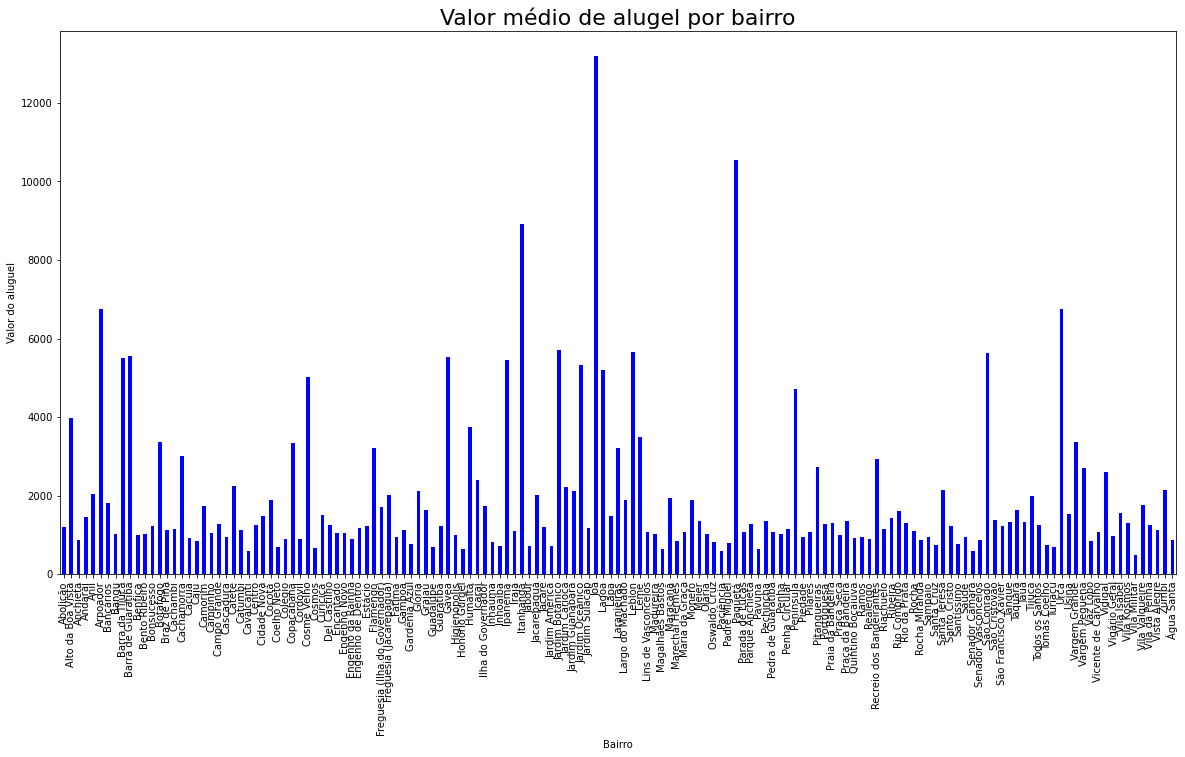

In [108]:
fig = neighborhood_group['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio de alugel por bairro', { 'fontsize': 22 })

## Creating value bands

In [109]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep = ';')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [110]:
# 0 - 2
# 3 - 4
# 5 - 6
# 7 - +
bands = [0, 2, 4, 6, 100]

In [111]:
rooms = pd.cut(dataframe['Quartos'], bands)

In [112]:
rooms

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
19826    (0.0, 2.0]
19827    (0.0, 2.0]
19828    (0.0, 2.0]
19829    (0.0, 2.0]
19830           NaN
Name: Quartos, Length: 19831, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [113]:
pd.value_counts(rooms)

(0, 2]      11074
(2, 4]       8094
(4, 6]        470
(6, 100]       36
Name: Quartos, dtype: int64

In [114]:
labels = [ '1 and 2 rooms', '3 and 4 rooms', '5 and 6 rooms', '7 or more rooms' ]

rooms = pd.cut(dataframe['Quartos'], bands, labels=labels)
pd.value_counts(rooms)

1 and 2 rooms      11074
3 and 4 rooms       8094
5 and 6 rooms        470
7 or more rooms       36
Name: Quartos, dtype: int64

## Removing outliers

In [115]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep = ';')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


<AxesSubplot:>

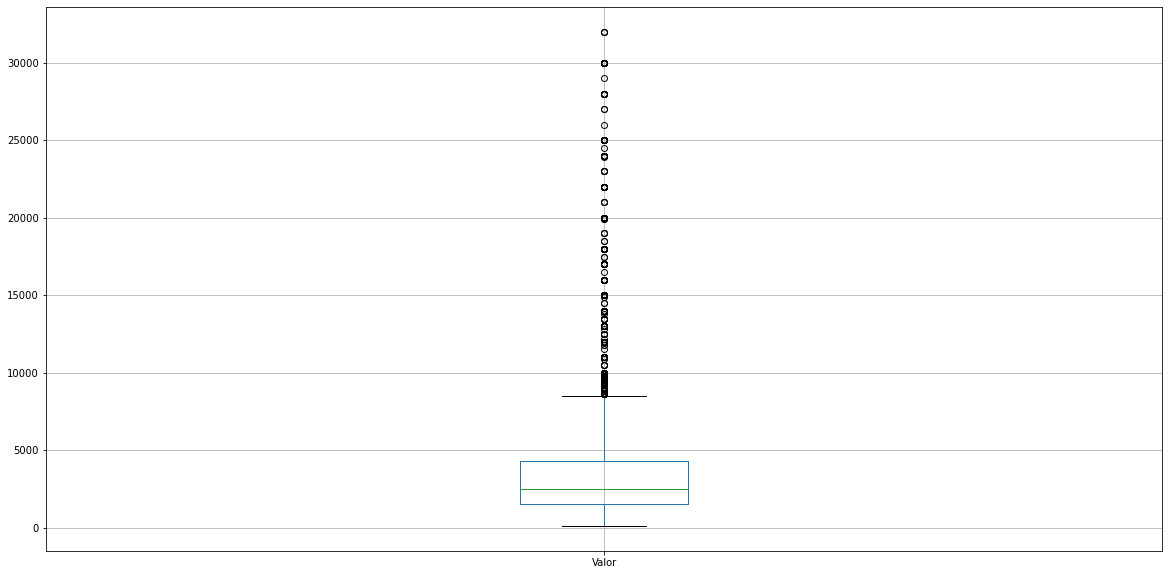

In [116]:
dataframe.boxplot(['Valor'])

In [117]:
dataframe[dataframe['Valor'] > 30000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
17919,Casa de Condomínio,Barra da Tijuca,5,6,4,1000,32000.0,3000.0,1700.0,32.00,Casa
18348,Casa de Condomínio,Barra da Tijuca,5,6,5,1200,32000.0,2134.0,17480.0,26.67,Casa
18697,Casa de Condomínio,Barra da Tijuca,5,4,5,850,32000.0,1510.0,15804.0,37.65,Casa


<img src="./img/boxplot-outliers.png">

In [118]:
values = dataframe['Valor']

q1 = values.quantile(.25)
q3 = values.quantile(.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [119]:
fixed_dataframe = dataframe[(lower_limit <= values) & (values <= upper_limit)]

<AxesSubplot:>

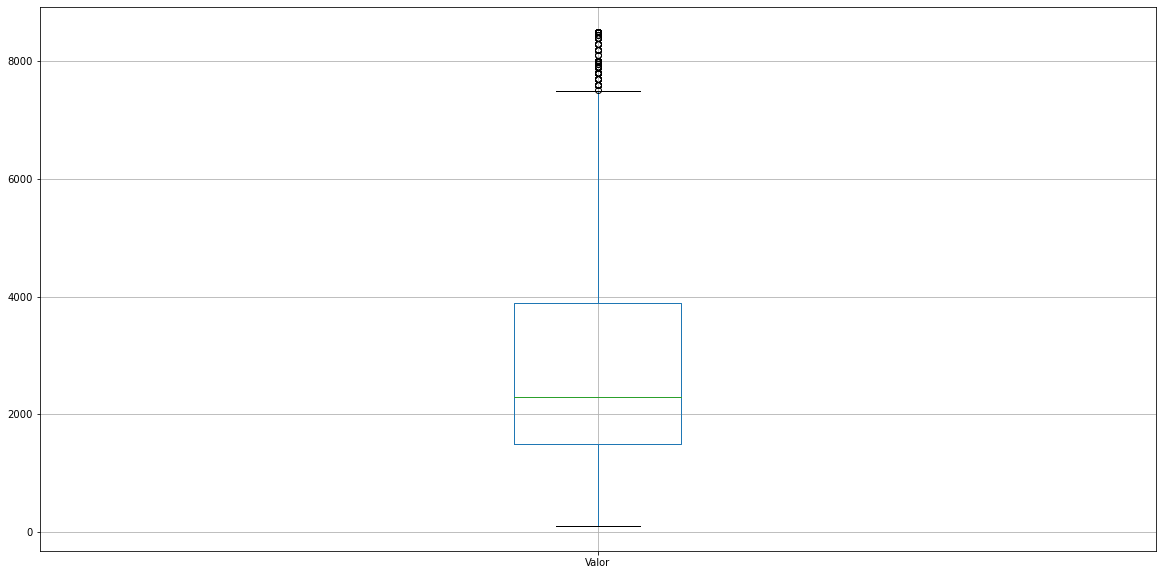

In [120]:
fixed_dataframe.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

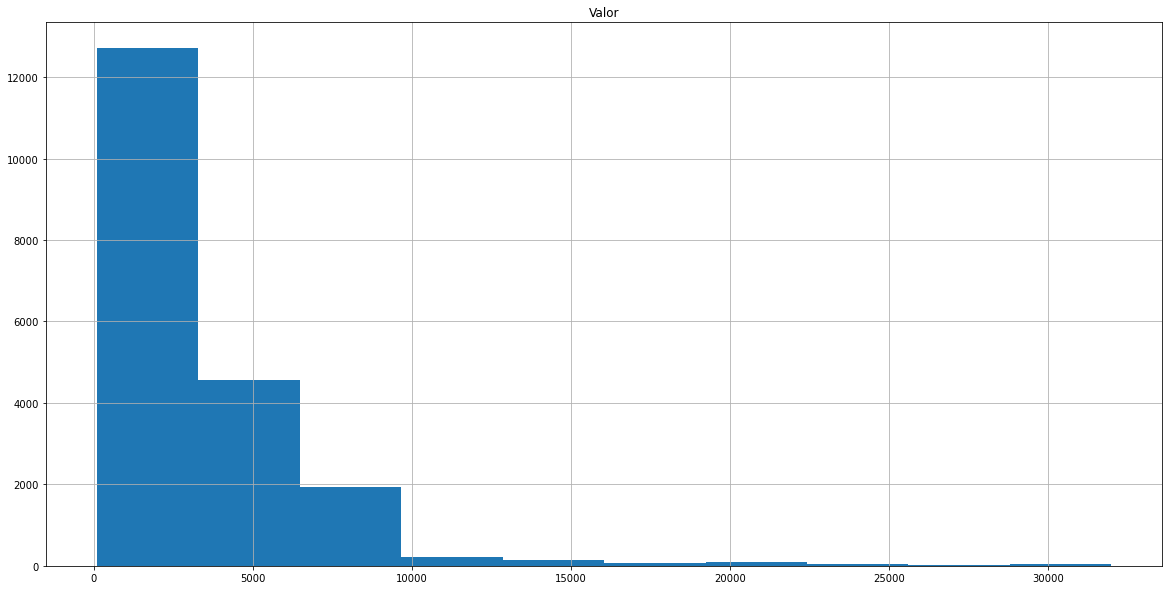

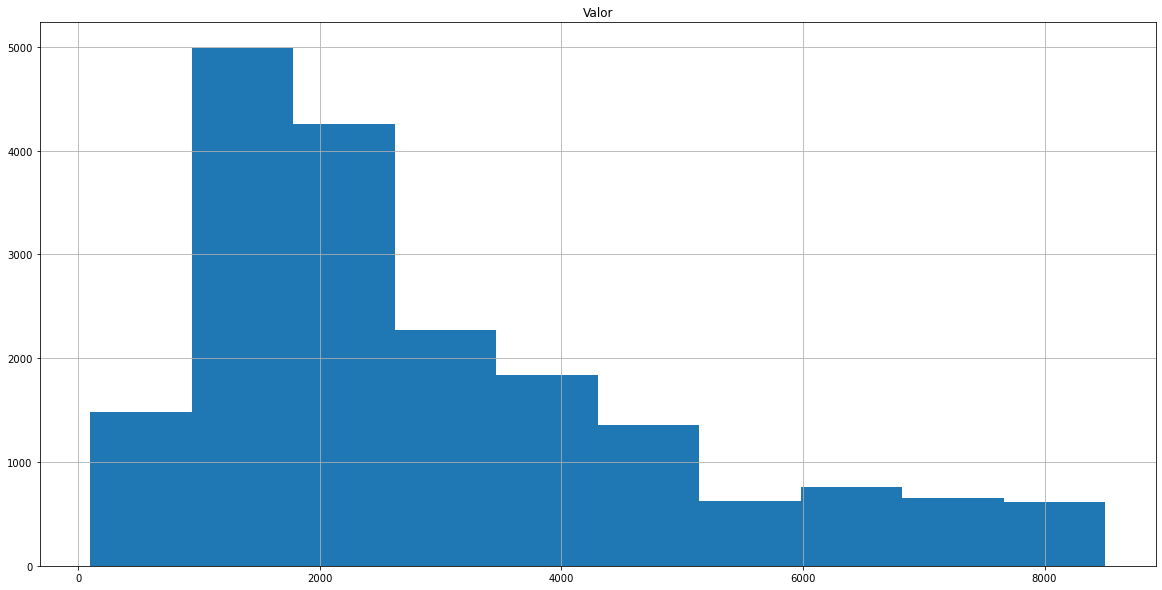

In [121]:
dataframe.hist(['Valor'])
fixed_dataframe.hist(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

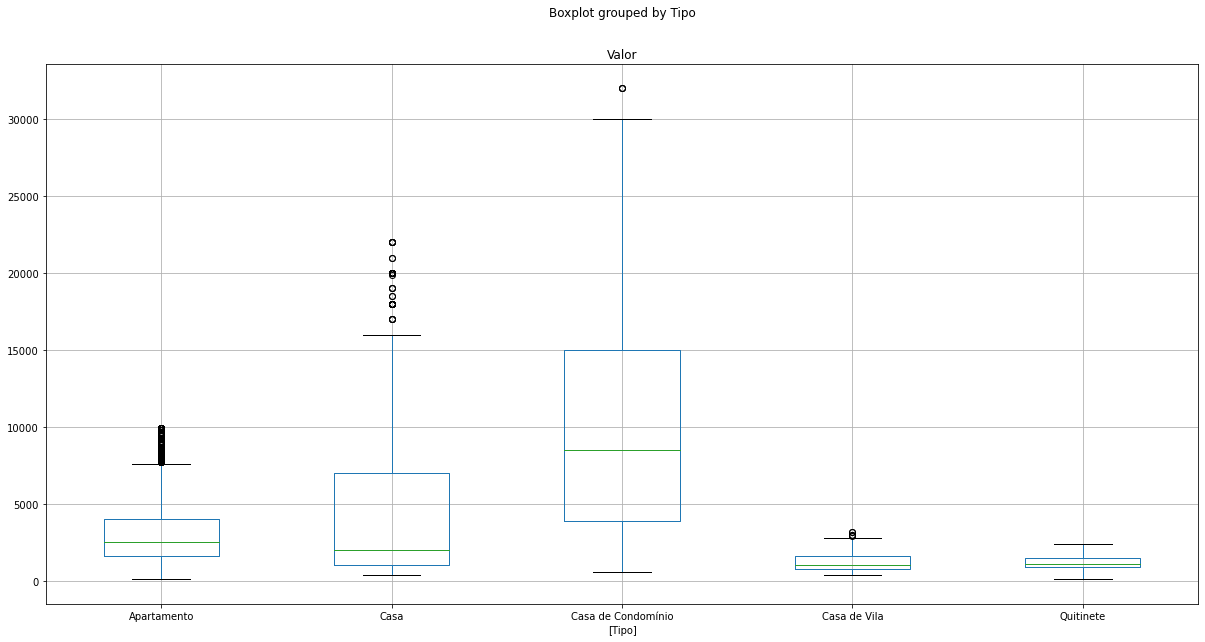

In [122]:
dataframe.boxplot(['Valor'], by=['Tipo'])

In [123]:
group = dataframe.groupby('Tipo')['Valor']

In [124]:
type(group)

pandas.core.groupby.generic.SeriesGroupBy

In [125]:
values = dataframe['Valor']

q1 = group.quantile(.25)
q3 = group.quantile(.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [126]:
lower_limit

Tipo
Apartamento           -2000.0
Casa                  -8000.0
Casa de Condomínio   -12750.0
Casa de Vila           -525.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [127]:
upper_limit

Tipo
Apartamento            7600.0
Casa                  16000.0
Casa de Condomínio    31650.0
Casa de Vila           2875.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [133]:
fixed_dataframe = pd.DataFrame()

for key in group.groups.keys():
    filter_type = dataframe['Tipo'] == key
    filter_value = (lower_limit[key] <= dataframe['Valor']) & (dataframe['Valor'] <= upper_limit[key])
    
    fixed_dataframe = pd.concat([fixed_dataframe, dataframe[filter_type & filter_value]])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

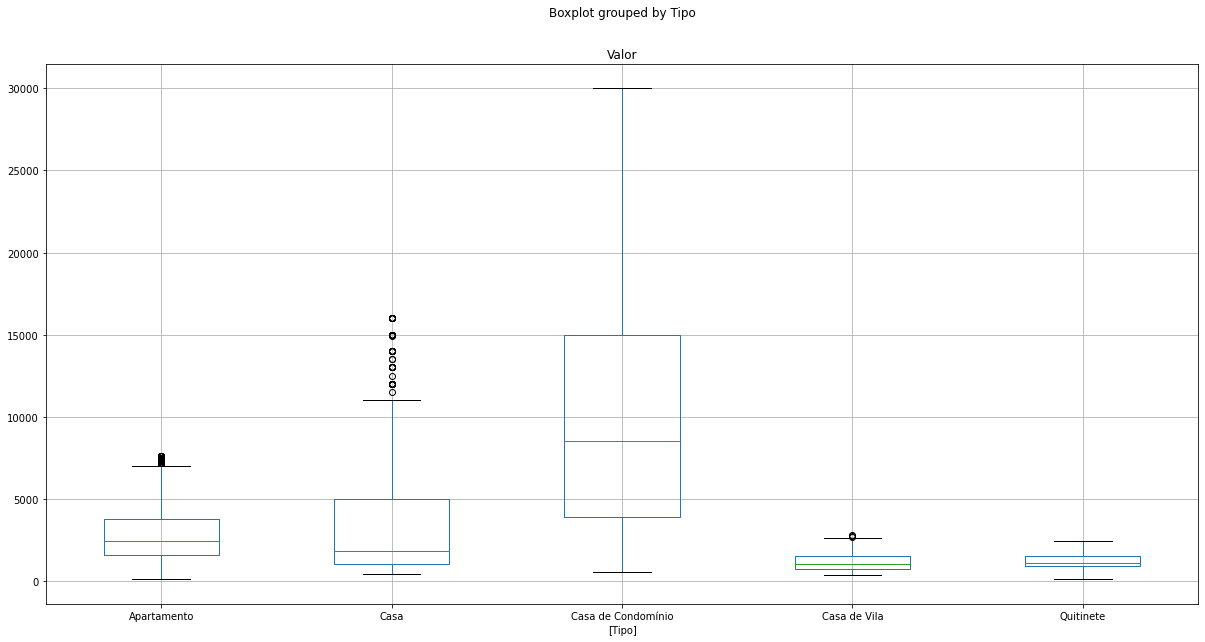

In [134]:
fixed_dataframe.boxplot(['Valor'], by=['Tipo'])

## More charts

In [135]:
dataframe = pd.read_csv('./data/extras/dados/aluguel.csv', sep = ';')
dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [141]:
figure = plt.figure()

<Figure size 1440x720 with 0 Axes>

In [142]:
g1 = figure.add_subplot(2, 2, 1)
g2 = figure.add_subplot(2, 2, 2)
g3 = figure.add_subplot(2, 2, 3)
g4 = figure.add_subplot(2, 2, 4)

In [143]:
g1.scatter(dataframe['Valor'], dataframe['Area'])
g1.set_title('Value X Area')

g2.hist(dataframe['Valor'])
g2.set_title('Hist Value')

data_g3 = dataframe['Valor'].sample(100)
data_g3.index = range(data_g3.shape[0])
g3.plot(data_g3)
g3.set_title('Sample data')

group = dataframe.groupby('Tipo')['Valor']
g4.bar(group.mean().index, group.mean().values)
g4.set_title('Mean Value by Type')

Text(0.5, 1.0, 'Mean Value by Type')

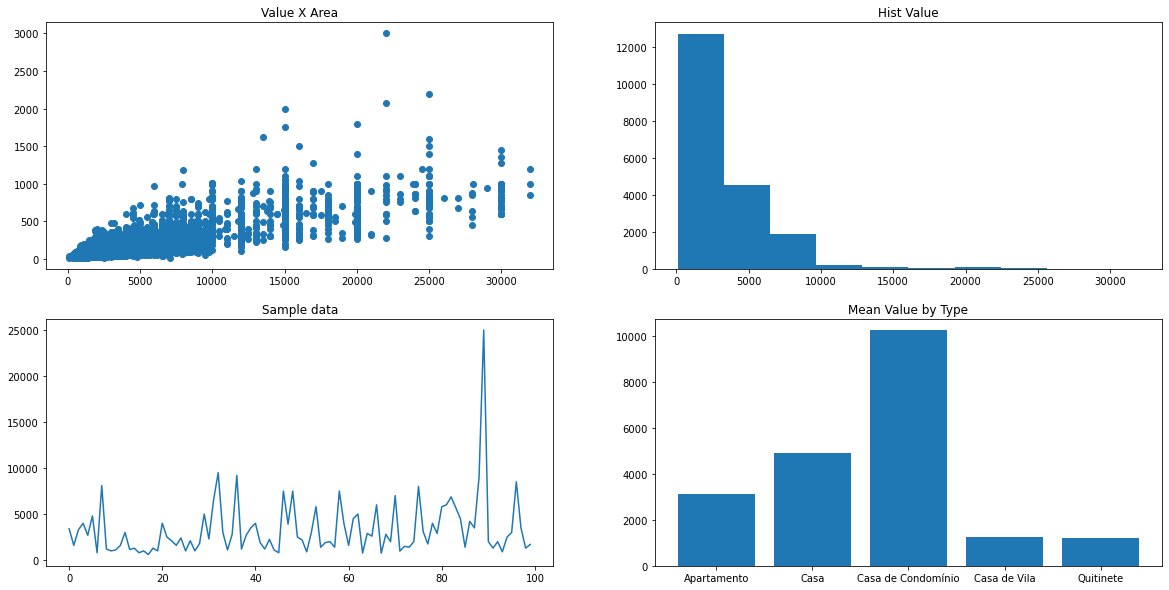

In [144]:
figure

**End of first module**

---
# Alura Course - Pandas IO

In [151]:
import pandas as pd
import numpy as np

## Creating students dataframe (from most common names in Brazil)

In [147]:
masc_names = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
fem_names = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [148]:
names = pd.concat([masc_names, fem_names])['nome'].to_frame()

In [161]:
names.sample(5)

,nome
75,NELSON
120,JOSIANE
106,ARTUR
111,TAMIRES
171,VALDEMIR


In [152]:
np.random.seed(123)

In [153]:
len(names)

400

In [154]:
names['student_id'] = np.random.permutation(len(names)) + 1

In [159]:
names.sample(5)

,nome,student_id
113,ROBERTA,260
160,LEILA,181
146,SAMARA,279
34,CRISTIANE,152
61,BIANCA,198


In [162]:
fake_domains = ['@fakemail.com', '@imaginary.com']

names['domain'] = np.random.choice(fake_domains, len(names))
names

,nome,student_id,domain
0,JOSE,235,@imaginary.com
1,JOAO,43,@imaginary.com
2,ANTONIO,304,@imaginary.com
3,FRANCISCO,156,@fakemail.com
4,CARLOS,343,@fakemail.com
...,...,...,...
195,ROSANE,231,@fakemail.com
196,IVONETE,99,@imaginary.com
197,LUCIANE,323,@imaginary.com
198,ISADORA,383,@imaginary.com


In [164]:
names['email'] = names['nome'].str.cat(names['domain']).str.lower()
names.sample(5)

,nome,student_id,domain,email
158,INGRID,354,@fakemail.com,ingrid@fakemail.com
7,FERNANDA,29,@imaginary.com,fernanda@imaginary.com
116,DOMINGOS,261,@fakemail.com,domingos@fakemail.com
108,VALTER,31,@imaginary.com,valter@imaginary.com
190,LURDES,58,@fakemail.com,lurdes@fakemail.com


In [171]:
names.rename(columns={'nome':'name'}, inplace=True)
names.sample(5)

,name,student_id,domain,email
15,BRUNO,347,@fakemail.com,bruno@fakemail.com
167,TAINARA,85,@fakemail.com,tainara@fakemail.com
165,EUNICE,177,@imaginary.com,eunice@imaginary.com
168,CRISTIAN,82,@fakemail.com,cristian@fakemail.com
180,EDER,167,@fakemail.com,eder@fakemail.com


## Reading courses datafrae

In [165]:
import html5lib

In [168]:
courses = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')[0]
courses.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [170]:
courses.rename(columns={'Nome do curso': 'course_name'}, inplace=True)
courses.head()

,course_name
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [173]:
courses['id'] = courses.index + 1
courses.head()

,course_name,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [174]:
courses.set_index('id', inplace=True)
courses.head()

,course_name
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [179]:
names['enrollment'] = np.ceil(np.random.exponential(size=len(names)) * 1.5).astype(int)
names.sample(5)

,name,student_id,domain,email,enrollment
5,JULIANA,11,@fakemail.com,juliana@fakemail.com,1
196,ARLINDO,222,@fakemail.com,arlindo@fakemail.com,1
134,VERONICA,245,@imaginary.com,veronica@imaginary.com,1
20,MANOEL,200,@fakemail.com,manoel@fakemail.com,1
43,TEREZINHA,339,@fakemail.com,terezinha@fakemail.com,2


In [180]:
names.enrollment.describe()

count    400.000000
mean       2.132500
std        1.576756
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: enrollment, dtype: float64

In [181]:
import seaborn as sns

<AxesSubplot:xlabel='enrollment', ylabel='Count'>

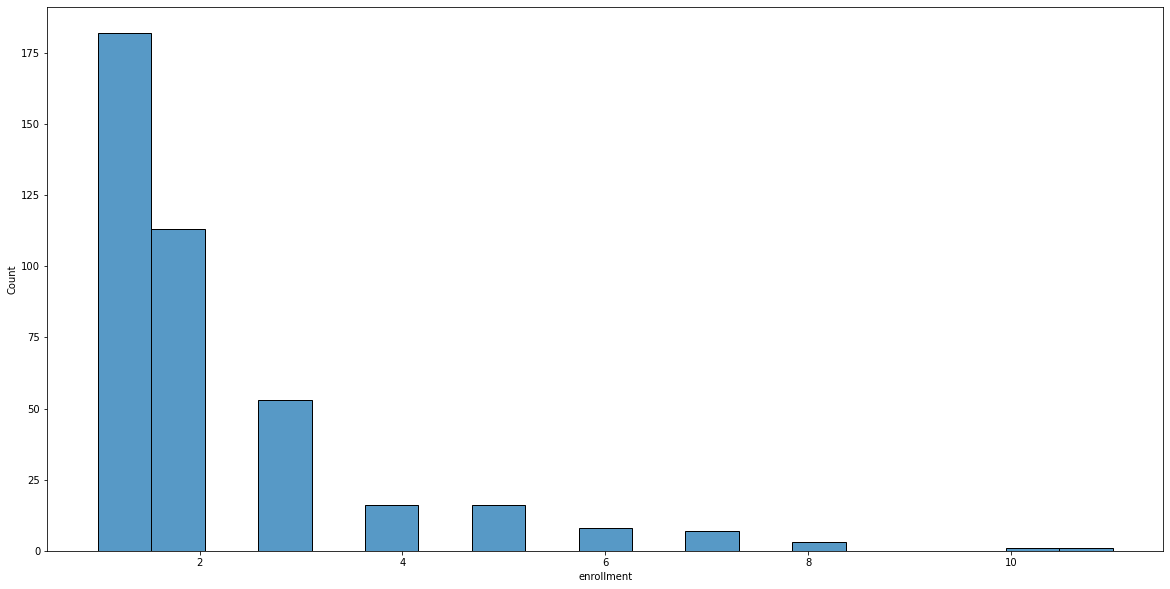

In [184]:
sns.histplot(names.enrollment)

In [185]:
names.enrollment.value_counts()

1     182
2     113
3      53
4      16
5      16
6       8
7       7
8       3
10      1
11      1
Name: enrollment, dtype: int64

In [189]:
all_enrollments = []
x = np.random.rand(len(courses))
prob = x / sum(x)

In [191]:
for index, row in names.iterrows():
    id = row.student_id
    enrollments = row.enrollment
    for i in range(enrollments):
        enroll = [id, np.random.choice(courses.index, p=prob)]
        all_enrollments.append(enroll)
        
enrollments = pd.DataFrame(all_enrollments, columns=['student_id', 'course_id'])

In [193]:
enrollments.head()

,student_id,course_id
0,235,15
1,235,14
2,235,3
3,43,7
4,43,7


In [208]:
enrollments_by_course = enrollments.groupby('course_id').count().join(courses.course_name)
enrollments_by_course.rename(columns={'student_id': 'students_count'}, inplace=True)

In [209]:
enrollments_by_course.head()

,students_count,course_name
course_id,,
1,33,Lógica de programação
2,7,Java para Web
3,58,C# para Web
4,39,Ruby on Rails
5,35,Cursos de Python


In [211]:
enrollments_by_course.to_csv('./data/enrollments_by_course.csv', index=False)

In [215]:
enrollments_by_course_json = enrollments_by_course.to_json(force_ascii=False)

In [216]:
enrollments_by_course_json

'{"students_count":{"1":33,"2":7,"3":58,"4":39,"5":35,"6":20,"7":48,"8":55,"9":27,"10":105,"11":34,"12":23,"13":11,"14":106,"15":50,"16":93,"17":8,"18":42,"19":36,"20":23},"course_name":{"1":"Lógica de programação","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integrações com Java","9":"TDD com Java","10":"Código limpo com C#","11":"Preparatório para certificação Java","12":"Hardware básico","13":"Persistência com .NET","14":"Desenvolvendo jogos","15":"Análise de dados","16":"Estatística básica","17":"Internet das coisas","18":"Programação funcional","19":"Boas práticas em Java","20":"Orientação objetos com Java"}}'

In [214]:
enrollments_by_course_html = enrollments_by_course.to_html()
enrollments_by_course_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>students_count</th>\n      <th>course_name</th>\n    </tr>\n    <tr>\n      <th>course_id</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>33</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>7</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>58</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>39</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>35</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>20</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>48</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>55</td>\n      <td>Novas integrações com Java</td>\n    </tr

## SQL Dataframe

In [225]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [218]:
engine = create_engine('sqlite:///:memory:')
inspector = inspect(engine)

In [219]:
enrollments_by_course.to_sql('enrollments', engine)

In [227]:
inspector.get_table_names()

['enrollments']

In [231]:
sql = 'select * from enrollments where students_count < 20'
pd.read_sql(sql, engine)

,course_id,students_count,course_name
0,2,7,Java para Web
1,13,11,Persistência com .NET
2,17,8,Internet das coisas


In [235]:
many_students = pd.read_sql_table('enrollments', engine, columns=['course_name', 'students_count'])

In [238]:
many_students.query('students_count > 60', inplace=True)
many_students

,course_name,students_count
9,Código limpo com C#,105
13,Desenvolvendo jogos,106
15,Estatística básica,93
